In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.isnull().sum().max()

np.int64(0)

In [7]:
print(f"fraud: {round(df['Class'].value_counts()[0]/len(df) * 100,2)}% of the dataset")
print(f"not fraud: {round(df['Class'].value_counts()[1]/len(df) * 100,2)}% of the dataset")

fraud: 99.83% of the dataset
not fraud: 0.17% of the dataset


In [8]:
def graph_distributions(df):
    colors = ["#0101DF", "#DF0101"]
    sns.countplot(x='Class', data=df, palette=colors, hue='Class', legend=False)
    plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
    plt.show()

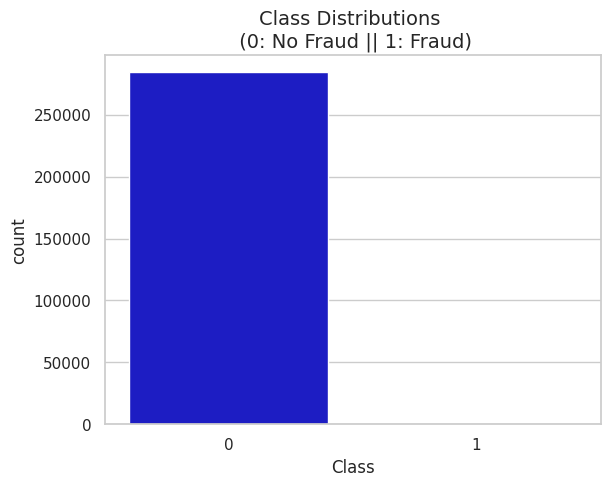

In [9]:
graph_distributions(df)

In [10]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [11]:
def plot_kdeplot(data, color, title, xlabel, ylabel):
    ax = sns.kdeplot(data, fill=True, color=color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel) 
    plt.tight_layout()
    plt.show() 

In [14]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

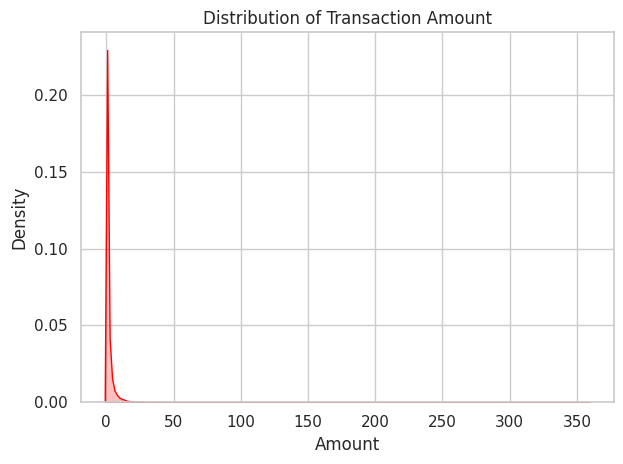

In [15]:
plot_kdeplot(df['scaled_amount'], 'red', 'Distribution of Transaction Amount', 'Amount', 'Density')

In [16]:
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [17]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [18]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

print(f"no fraud: {round(df['Class'].value_counts()[0]/len(df) * 100,2)}% of the dataset")
print(f"fraud: {round(df['Class'].value_counts()[1]/len(df) * 100,2)}% of the dataset")

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits = 5, random_state=None, shuffle=False)

no fraud: 99.83% of the dataset
fraud: 0.17% of the dataset


In [20]:
for train_index, test_index in sss.split(X, y):
    print(f"Train: {train_index}, Test: {test_index}")
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, originalytest = y.iloc[train_index], y.iloc[test_index]

train_unique_label, train_counts_label = np.unique(ar=original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(ar=originalytest, return_counts=True)

print('-' * 100)

Train: [ 30473  30496  31002 ... 284804 284805 284806], Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806], Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806], Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806], Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868], Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------


In [21]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
77161,-0.210997,-0.326296,-1.032060,-0.091538,0.958333,-2.003466,0.680685,4.458000,-1.562592,1.001068,...,-0.205859,-0.172542,0.019396,-0.144573,1.096433,-0.597940,1.546800,-1.155643,-0.387386,0
154694,4.540488,0.210646,-2.877176,4.569649,-9.553069,4.441079,-3.653961,-1.877981,-3.514353,1.547608,...,0.105615,1.272896,1.300268,-0.003950,-0.360848,-0.597526,-0.390901,0.592197,-0.241010,1
103133,-0.279466,-0.190110,1.168123,0.317552,0.410338,0.977951,0.102256,0.160946,-0.044139,0.086027,...,-0.096099,-0.007293,0.045994,-0.030634,-0.295125,0.474358,-0.418943,0.041582,0.011701,0
150601,-0.293440,0.106322,-3.291125,4.401194,-8.394212,4.453580,-4.790055,-4.240182,-9.219001,1.974030,...,1.490869,2.102343,0.597370,-0.328086,0.445752,0.585281,-0.399005,2.116004,1.050744,1
46998,2.546915,-0.489479,-1.109646,0.811069,-1.138135,0.935265,-2.330248,-0.116106,-1.621986,0.458028,...,0.168891,0.641594,0.841755,0.176728,0.081004,-0.258899,0.707654,0.418649,0.080756,1


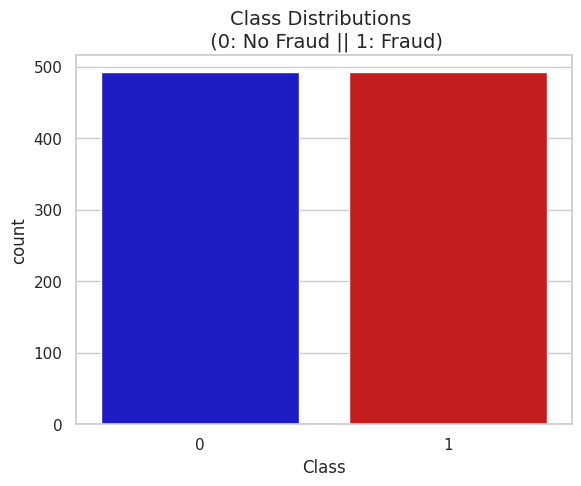

In [22]:
graph_distributions(new_df)

In [23]:
print(new_df['Class'].value_counts()/len(new_df))

Class
0    0.5
1    0.5
Name: count, dtype: float64


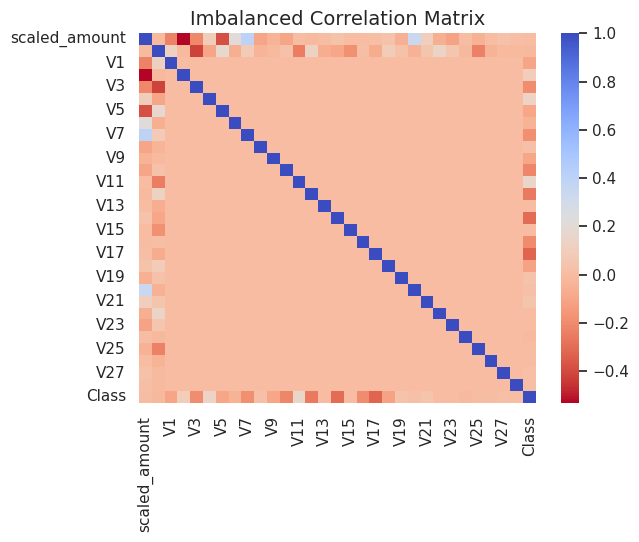

In [24]:
corr = df.corr()
ax = sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
ax.set_title('Imbalanced Correlation Matrix', fontsize=14)
plt.show()

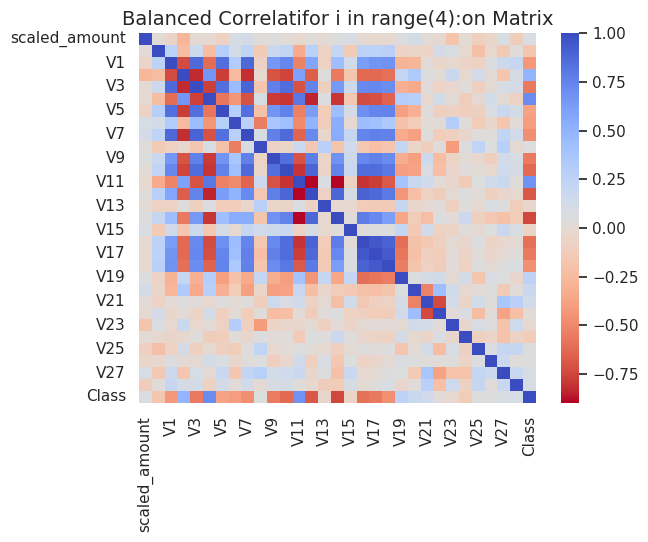

In [25]:
corr_balanced = new_df.corr()
ax = sns.heatmap(corr_balanced, cmap='coolwarm_r', annot_kws={'size':20})
ax.set_title('Balanced Correlatifor i in range(4):on Matrix', fontsize=14)
plt.show()

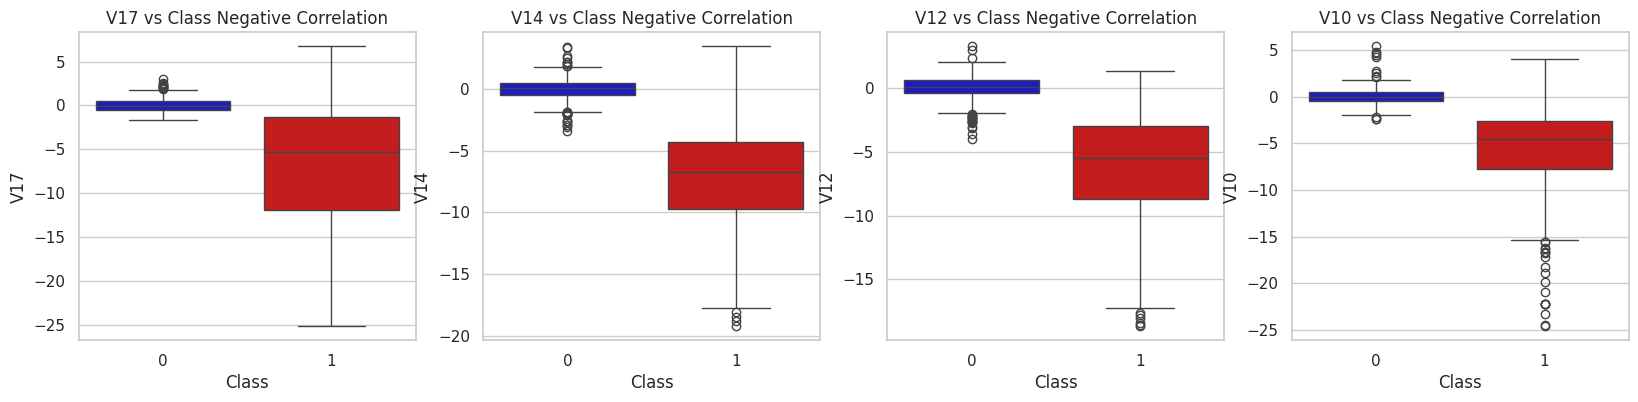

In [26]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

colors = ["#0101DF", "#DF0101"]

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0], hue="Class", legend=False)
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1], hue="Class", legend=False)
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2], hue="Class", legend=False)
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3], hue="Class", legend=False)
axes[3].set_title('V10 vs Class Negative Correlation')


plt.show()

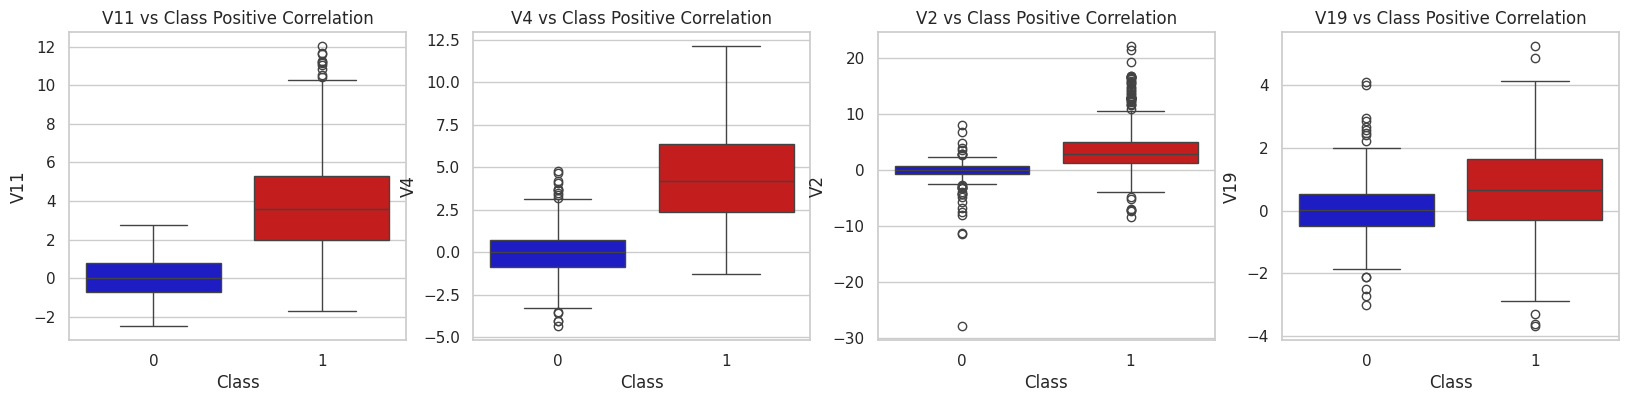

In [27]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0], hue="Class", legend=False)
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1], hue="Class", legend=False)
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2], hue="Class", legend=False)
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3], hue="Class", legend=False)
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

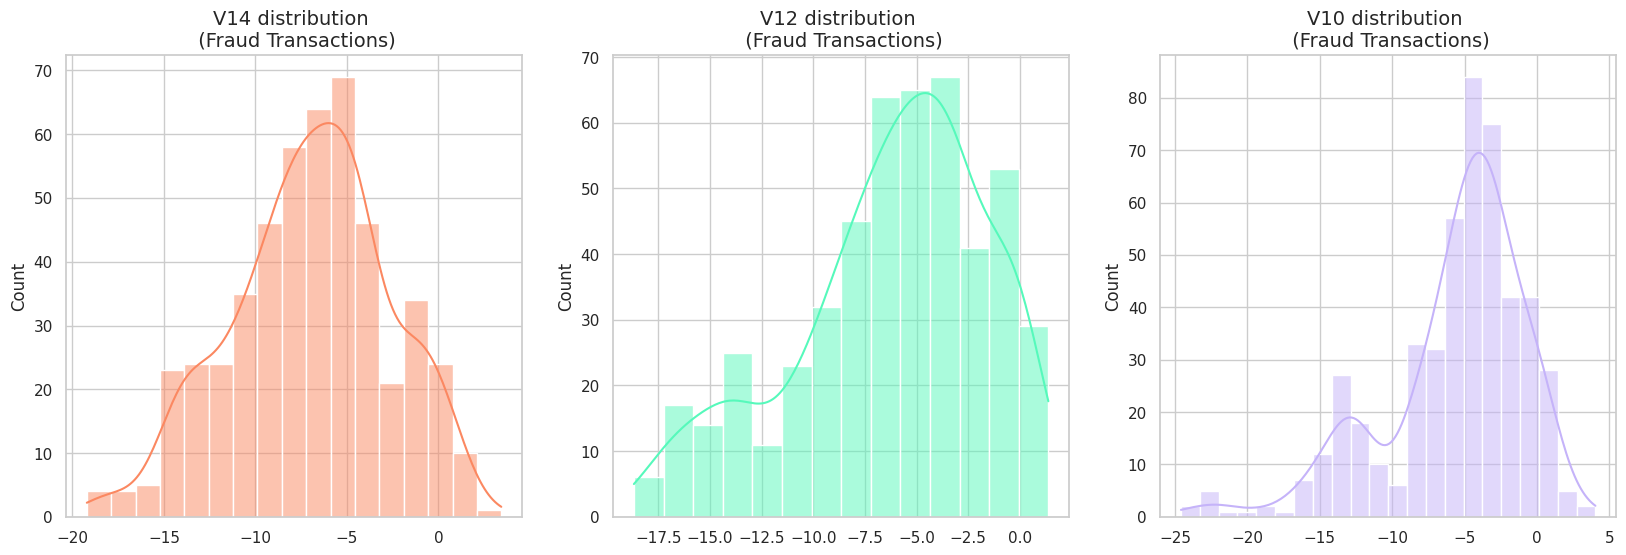

In [28]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.histplot(v14_fraud_dist, ax=ax1, color="#FB8861", kde=True)
ax1.set_title("V14 distribution \n (Fraud Transactions)", fontsize=14)

v12_fraud_dist = new_df["V12"].loc[new_df['Class'] == 1].values
sns.histplot(data=v12_fraud_dist, ax=ax2, color="#56F9BB", kde=True)
ax2.set_title("V12 distribution \n (Fraud Transactions)", fontsize=14)

v10_fraud_dist = new_df["V10"].loc[new_df['Class'] == 1].values
sns.histplot(data=v10_fraud_dist, ax=ax3, color="#C5B3F9", kde=True)
ax3.set_title("V10 distribution \n (Fraud Transactions)", fontsize=14)

plt.show()

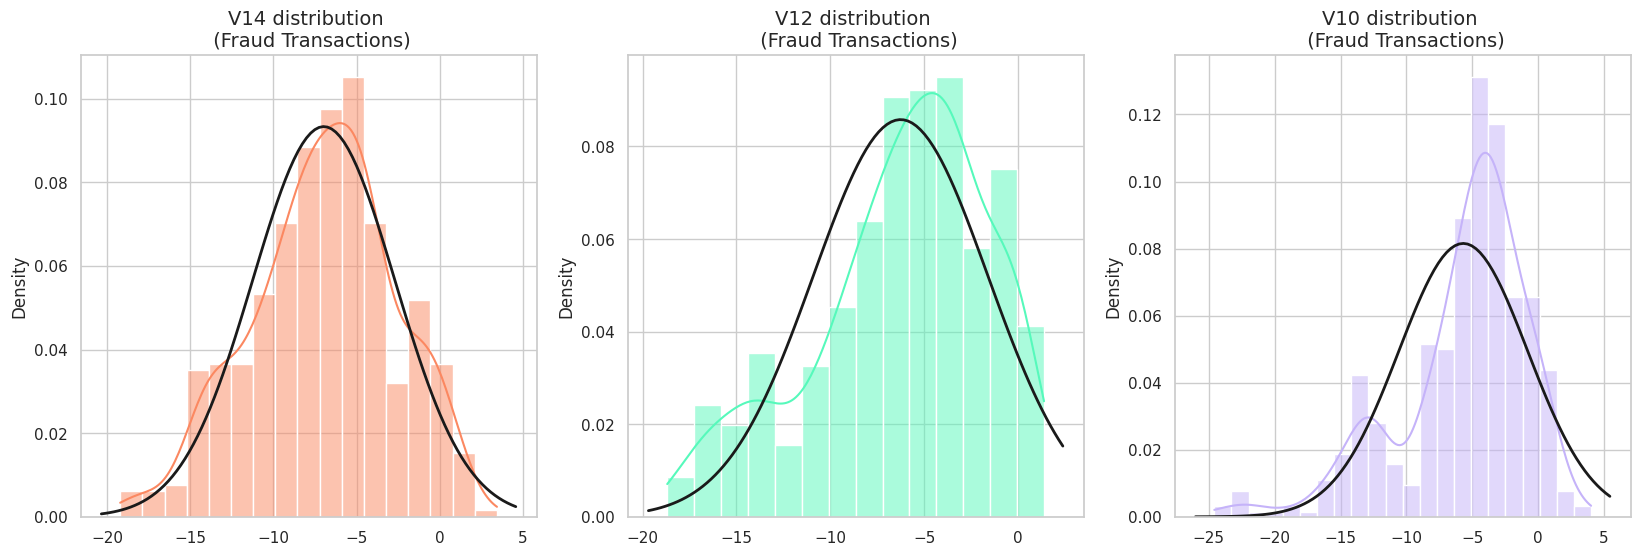

In [29]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.histplot(v14_fraud_dist, ax=ax1, color="#FB8861", kde=True, stat='density')
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(v14_fraud_dist), np.std(v14_fraud_dist))
ax1.plot(x, p, 'k', linewidth=2)
ax1.set_title("V14 distribution \n (Fraud Transactions)", fontsize=14)

v12_fraud_dist = new_df["V12"].loc[new_df['Class'] == 1].values
sns.histplot(v12_fraud_dist, ax=ax2, color="#56F9BB", kde=True, stat='density')
xmin, xmax = ax2.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(v12_fraud_dist), np.std(v12_fraud_dist))
ax2.plot(x, p, 'k', linewidth=2)
ax2.set_title("V12 distribution \n (Fraud Transactions)", fontsize=14)

v10_fraud_dist = new_df["V10"].loc[new_df['Class'] == 1].values
sns.histplot(v10_fraud_dist, ax=ax3, color="#C5B3F9", kde=True, stat='density')
xmin, xmax = ax3.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(v10_fraud_dist), np.std(v10_fraud_dist))
ax3.plot(x, p, 'k', linewidth=2)
ax3.set_title("V10 distribution \n (Fraud Transactions)", fontsize=14)

plt.show()

In [33]:
def cut_off_outliers(data, feature):
    fraud = data[feature].loc[data['Class'] == 1].values
    q25, q75 = np.percentile(fraud, 25), np.percentile(fraud, 75)
    print(f"Quratile 25 {q25} | Quartile 75 {q75}")
    iqr = q75 - q25
    print(f"iqr: {iqr}")

    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print(f"Cut Off: {cut_off}")
    print(f"{feature} Lower: {lower}")
    print(f"{feature} Upper: {upper}")

    outliers = [x for x in fraud if x < lower or x > upper]
    print(f"Feature {feature} Outliers for Fraud Cases: {len(outliers)}")
    print(f"{feature} outliers: {outliers}")

    return lower, upper

cut_off_outliers(data=new_df, feature='V14')
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)

Quratile 25 -9.575295322640558 | Quartile 75 -4.2635884498344705
iqr: 5.311706872806088
Cut Off: 7.967560309209132
V14 Lower: -17.54285563184969
V14 Upper: 3.7039718593746613
Feature V14 Outliers for Fraud Cases: 2
V14 outliers: [np.float64(-17.7216383537133), np.float64(-17.6206343516773)]
